In [39]:
import zipfile
import os
import seaborn as sns
import numpy as np
import pandas as pd
from glob import glob
import shutil, sys 
import os
import cv2
from matplotlib import pyplot as plt
import PIL.Image
from IPython.display import Image
from sklearn.metrics import confusion_matrix

import torch
import torch.nn as nn
import torchvision
from torchvision import models,transforms,datasets
import time
from tqdm import tqdm
import random
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [7]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [8]:
filepath = '/content/drive/MyDrive/523_DeepLearning/FinalProject/Data/'

In [9]:
dataList = pd.read_csv(filepath+'driver_imgs_list.csv') 

In [10]:
dataList

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg
...,...,...,...
22419,p081,c9,img_56936.jpg
22420,p081,c9,img_46218.jpg
22421,p081,c9,img_25946.jpg
22422,p081,c9,img_67850.jpg


In [ ]:
#!unzip /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/imgs.zip

# Donot re-run the below code from this point

In [ ]:
!unzip "/content/drive/MyDrive/523_DeepLearning/FinalProject/Data/train.zip" -d "/content/drive/MyDrive/523_DeepLearning/FinalProject/Data/OriginalData"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/OriginalData/train/c4/img_17718.jpg  
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/OriginalData/train/c4/img_6731.jpg  
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/OriginalData/train/c4/img_83623.jpg  
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/OriginalData/train/c4/img_41576.jpg  
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/OriginalData/train/c4/img_13230.jpg  
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/OriginalData/train/c4/img_42719.jpg  
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/OriginalData/train/c4/img_49658.jpg  
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/OriginalData/train/c4/img_84158.jpg  
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/Origina

In [ ]:
print('Number of images in training set = ',str(len(glob(filepath+'OriginalData/train/*/*.jpg'))))


Number of images in training set =  22424


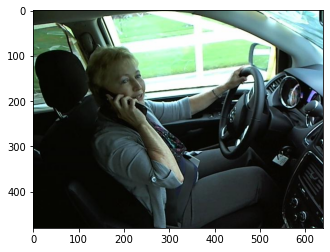

In [ ]:
img = cv2.imread(filepath+"OriginalData/train/c2/img_258.jpg")
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()

In [ ]:
!unzip "/content/drive/MyDrive/523_DeepLearning/FinalProject/Data/train.zip" -d "/content/drive/MyDrive/523_DeepLearning/FinalProject/Data/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/train/c4/img_17718.jpg  
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/train/c4/img_6731.jpg  
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/train/c4/img_83623.jpg  
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/train/c4/img_41576.jpg  
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/train/c4/img_13230.jpg  
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/train/c4/img_42719.jpg  
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/train/c4/img_49658.jpg  
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/train/c4/img_84158.jpg  
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/train/c4/img_18417.jpg  
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/train/c4/img_13

In [ ]:
#os.rename(filepath+"train",filepath+"TrainData")

In [ ]:
len(dataList[dataList['subject'].isin(['p026','p012'])]['img'].tolist())

2019

In [ ]:
filestotransfer = dataList[dataList['subject'].isin(['p012','p026'])]['img'].tolist()

In [ ]:
for fname in filestotransfer:
    shutil.copy2(glob(filepath+"train/*/"+fname)[0], "/content/drive/MyDrive/523_DeepLearning/FinalProject/Data/TestData/")

In [ ]:
print('Number of images in training set = ',str(len(glob(filepath+'train/*/*'))))

Number of images in training set =  22424


In [ ]:
for fname in filestotransfer:
    os.remove(glob(filepath+"train/*/"+fname)[0])

In [6]:
print('Number of images in training set = ',str(len(glob(filepath+'train/*/*.jpg'))))
print('Number of images in testing set = ',str(len(glob(filepath+'TestData/*.jpg'))))


Number of images in training set =  20405
Number of images in testing set =  2019


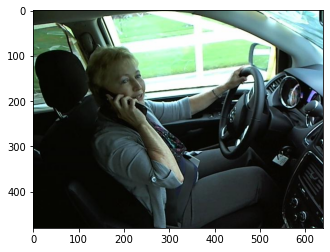

In [7]:
img = cv2.imread(filepath+"train/c2/img_258.jpg")
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()

In [8]:
classes = [c for c in os.listdir(filepath+"train") if not c.startswith(".")]
classes.sort()
print(classes)

['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']


In [71]:
class_dict = {0 : "safe driving",
              1 : "texting - right",
              2 : "talking on the phone - right",
              3 : "texting - left",
              4 : "talking on the phone - left",
              5 : "operating the radio",
              6 : "drinking",
              7 : "reaching behind",
              8 : "hair and makeup",
              9 : "talking to passenger"}

Total number of training data : 20405


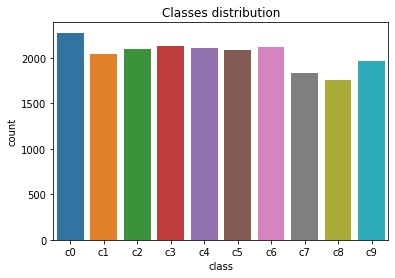

In [10]:
d = {"img" : [], "class" : []}
for c in classes:
    imgs = [img for img in os.listdir(os.path.join(filepath+"train",c)) if not img.startswith(".")]
    for img in imgs:
        d["img"].append(img)
        d["class"].append(c)
df = pd.DataFrame(d)
ax = sns.countplot(data=df,x="class")
ax.set(title="Classes distribution")
print("Total number of training data :",len(df))

# Donot re-run the above code tilll this point

VGG-16 Model

In [11]:
transform = transforms.Compose([transforms.Resize((400, 400)),
                                 transforms.RandomRotation(10),
                                 transforms.ToTensor()])

In [12]:
data = datasets.ImageFolder(root = filepath+"train", transform = transform)

total_len = len(data)
training_len = int(0.9*total_len)
val_len = total_len - training_len

training_data,val_data = torch.utils.data.random_split(data,(training_len,val_len))

In [13]:
train_loader = torch.utils.data.DataLoader(dataset=training_data,
                                           batch_size=32,
                                           shuffle=True,
                                           drop_last=False,
                                           num_workers=2)
val_loader = torch.utils.data.DataLoader(dataset=val_data,
                                          batch_size=32,
                                          shuffle=False,
                                          drop_last=False,
                                          num_workers=2)

In [14]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


In [15]:
model_ft = models.vgg16(pretrained=True)


/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [16]:
model_ft

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [17]:
#num_ftrs = model_ft.fc.in_features
num_ftrs = model_ft.classifier[6].out_features
model_ft.fc = nn.Linear(num_ftrs, 10)
model_ft = model_ft.to(device)
criterion = nn.CrossEntropyLoss()
# optimize parameters here
optimizer_ft = torch.optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)
# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer_ft, step_size=6, gamma=0.1)

In [18]:
model_ft

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [19]:
def eval_model(model,test_loader):
    correct = 0.0
    total = 0.0
    running_loss = 0.0
    with torch.no_grad():
        for i, data in enumerate(test_loader, 0):
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_acc = 100.0 * correct / total
    print('Accuracy of the network on the test images: %d %%' % (
        test_acc))
    return test_acc

In [20]:
def train_model(model, criterion, optimizer, scheduler, n_epochs = 1):
    
    losses = []
    train_accuracies = []
    val_accuracies = []
    # set the model to train mode initially
    model.train()
    for epoch in tqdm(range(n_epochs)):
        print("\nStarting epoch ", epoch+1)
        since = time.time()
        running_loss = 0.0
        running_correct = 0.0
        for data in train_loader:

            # get the inputs and assign them to cuda
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            
            # forward + backward + optimize
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            # calculate the loss/acc later
            running_loss += loss.item()
            running_correct += (labels==predicted).sum().item()

        epoch_duration = time.time()-since
        epoch_loss = running_loss/len(train_loader)
        epoch_acc = 100/32*running_correct/len(train_loader)

        print("Epoch %s, duration: %d s, loss: %.4f, acc: %.4f" % (epoch+1, epoch_duration, epoch_loss, epoch_acc))
        
        losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)
        
        # switch the model to eval mode to evaluate on test data
        model.eval()
        val_acc = eval_model(model,val_loader)
        val_accuracies.append(val_acc)
        if (epoch+1) % 3 == 0:
            torch.save(model.state_dict(), filepath+'Models/model_vgg_epoch{}.pth'.format(epoch+1)) 
        
        # re-set the model to train mode after validating
        model.train()
        scheduler.step(val_acc)
        since = time.time()
    print('Finished Training')
    return model, losses, train_accuracies, val_accuracies

In [21]:
# takes around 6-7 minutes per epoch with GPU
model_ft, training_losses, training_accs, val_accs = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, n_epochs=30)

  0%|          | 0/30 [00:00<?, ?it/s]


Starting epoch  1
Epoch 1, duration: 2718 s, loss: 0.7317, acc: 77.3682


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)
  3%|▎         | 1/30 [50:15<24:17:22, 3015.24s/it]

Accuracy of the network on the test images: 97 %

Starting epoch  2
Epoch 2, duration: 420 s, loss: 0.1184, acc: 96.4068


  7%|▋         | 2/30 [57:33<11:39:37, 1499.21s/it]

Accuracy of the network on the test images: 97 %

Starting epoch  3
Epoch 3, duration: 421 s, loss: 0.1214, acc: 96.2108
Accuracy of the network on the test images: 97 %


 10%|█         | 3/30 [1:04:53<7:37:06, 1015.81s/it]


Starting epoch  4
Epoch 4, duration: 421 s, loss: 0.1195, acc: 96.1727


 13%|█▎        | 4/30 [1:12:14<5:41:45, 788.66s/it] 

Accuracy of the network on the test images: 97 %

Starting epoch  5
Epoch 5, duration: 421 s, loss: 0.1178, acc: 96.2979


 17%|█▋        | 5/30 [1:19:34<4:36:16, 663.06s/it]

Accuracy of the network on the test images: 97 %

Starting epoch  6
Epoch 6, duration: 421 s, loss: 0.1210, acc: 96.1509
Accuracy of the network on the test images: 97 %


 20%|██        | 6/30 [1:26:57<3:55:14, 588.12s/it]


Starting epoch  7
Epoch 7, duration: 422 s, loss: 0.1167, acc: 96.2925


 23%|██▎       | 7/30 [1:34:18<3:27:00, 540.03s/it]

Accuracy of the network on the test images: 97 %

Starting epoch  8
Epoch 8, duration: 421 s, loss: 0.1196, acc: 96.2870


 27%|██▋       | 8/30 [1:41:39<3:06:25, 508.45s/it]

Accuracy of the network on the test images: 97 %

Starting epoch  9
Epoch 9, duration: 422 s, loss: 0.1206, acc: 96.2979
Accuracy of the network on the test images: 97 %


 30%|███       | 9/30 [1:49:01<2:50:46, 487.91s/it]


Starting epoch  10
Epoch 10, duration: 422 s, loss: 0.1178, acc: 96.2707


 33%|███▎      | 10/30 [1:56:23<2:37:55, 473.78s/it]

Accuracy of the network on the test images: 97 %

Starting epoch  11
Epoch 11, duration: 422 s, loss: 0.1193, acc: 96.2489


 37%|███▋      | 11/30 [2:03:44<2:26:48, 463.59s/it]

Accuracy of the network on the test images: 97 %

Starting epoch  12
Epoch 12, duration: 421 s, loss: 0.1200, acc: 96.4068
Accuracy of the network on the test images: 97 %


 40%|████      | 12/30 [2:11:06<2:17:05, 456.96s/it]


Starting epoch  13
Epoch 13, duration: 422 s, loss: 0.1167, acc: 96.3578


 43%|████▎     | 13/30 [2:18:26<2:08:03, 451.97s/it]

Accuracy of the network on the test images: 97 %

Starting epoch  14
Epoch 14, duration: 421 s, loss: 0.1212, acc: 96.2870


 47%|████▋     | 14/30 [2:25:47<1:59:35, 448.47s/it]

Accuracy of the network on the test images: 97 %

Starting epoch  15
Epoch 15, duration: 422 s, loss: 0.1163, acc: 96.3524
Accuracy of the network on the test images: 97 %


 50%|█████     | 15/30 [2:33:09<1:51:40, 446.70s/it]


Starting epoch  16
Epoch 16, duration: 422 s, loss: 0.1223, acc: 96.1346


 53%|█████▎    | 16/30 [2:40:30<1:43:48, 444.90s/it]

Accuracy of the network on the test images: 97 %

Starting epoch  17
Epoch 17, duration: 421 s, loss: 0.1189, acc: 96.3088


 57%|█████▋    | 17/30 [2:47:50<1:36:05, 443.48s/it]

Accuracy of the network on the test images: 97 %

Starting epoch  18
Epoch 18, duration: 421 s, loss: 0.1186, acc: 96.4014
Accuracy of the network on the test images: 97 %


 60%|██████    | 18/30 [2:55:12<1:28:35, 443.00s/it]


Starting epoch  19
Epoch 19, duration: 422 s, loss: 0.1196, acc: 96.0965


 63%|██████▎   | 19/30 [3:02:33<1:21:06, 442.42s/it]

Accuracy of the network on the test images: 97 %

Starting epoch  20
Epoch 20, duration: 421 s, loss: 0.1187, acc: 96.2598


 67%|██████▋   | 20/30 [3:09:54<1:13:38, 441.87s/it]

Accuracy of the network on the test images: 97 %

Starting epoch  21
Epoch 21, duration: 421 s, loss: 0.1168, acc: 96.4286
Accuracy of the network on the test images: 97 %


 70%|███████   | 21/30 [3:17:15<1:06:16, 441.82s/it]


Starting epoch  22
Epoch 22, duration: 422 s, loss: 0.1203, acc: 96.3034


 73%|███████▎  | 22/30 [3:24:36<58:51, 441.40s/it]  

Accuracy of the network on the test images: 97 %

Starting epoch  23
Epoch 23, duration: 421 s, loss: 0.1197, acc: 96.0638


 77%|███████▋  | 23/30 [3:31:56<51:27, 441.01s/it]

Accuracy of the network on the test images: 97 %

Starting epoch  24
Epoch 24, duration: 422 s, loss: 0.1196, acc: 96.3088
Accuracy of the network on the test images: 97 %


 80%|████████  | 24/30 [3:39:18<44:07, 441.30s/it]


Starting epoch  25
Epoch 25, duration: 422 s, loss: 0.1248, acc: 96.1564


 83%|████████▎ | 25/30 [3:46:38<36:45, 441.03s/it]

Accuracy of the network on the test images: 97 %

Starting epoch  26
Epoch 26, duration: 421 s, loss: 0.1166, acc: 96.4286


 87%|████████▋ | 26/30 [3:53:58<29:22, 440.72s/it]

Accuracy of the network on the test images: 97 %

Starting epoch  27
Epoch 27, duration: 422 s, loss: 0.1218, acc: 96.2326
Accuracy of the network on the test images: 97 %


 90%|█████████ | 27/30 [4:01:20<22:03, 441.16s/it]


Starting epoch  28
Epoch 28, duration: 422 s, loss: 0.1206, acc: 96.2652


 93%|█████████▎| 28/30 [4:08:42<14:42, 441.14s/it]

Accuracy of the network on the test images: 97 %

Starting epoch  29
Epoch 29, duration: 421 s, loss: 0.1187, acc: 96.2652


 97%|█████████▋| 29/30 [4:16:02<07:20, 440.99s/it]

Accuracy of the network on the test images: 97 %

Starting epoch  30
Epoch 30, duration: 422 s, loss: 0.1169, acc: 96.4231
Accuracy of the network on the test images: 97 %


100%|██████████| 30/30 [4:23:26<00:00, 526.88s/it]

Finished Training


In [22]:
training_losses

[0.7316582420514735,
 0.11842734535721225,
 0.12139104632498496,
 0.11954987737048378,
 0.11775800732584209,
 0.12095110232614059,
 0.11667643521445112,
 0.11957943766420051,
 0.12064811518782496,
 0.1178241044263443,
 0.11932862965545847,
 0.12001036704300484,
 0.11665053620207601,
 0.12119868622917539,
 0.11632052878768083,
 0.12228079367500408,
 0.11892265245928478,
 0.11856402835292736,
 0.11957134381066424,
 0.11867296670560273,
 0.11680846006401818,
 0.12034612817151102,
 0.1196910530500737,
 0.11959134806466747,
 0.12476284561665787,
 0.11658350219998756,
 0.12177372421219114,
 0.12061820677335565,
 0.11874802464794511,
 0.11694318764333578]

In [23]:
training_accs

[77.36824912891986,
 96.40679442508711,
 96.21080139372822,
 96.17269163763066,
 96.2979094076655,
 96.15091463414635,
 96.29246515679442,
 96.28702090592334,
 96.2979094076655,
 96.2706881533101,
 96.24891114982579,
 96.40679442508711,
 96.35779616724739,
 96.28702090592334,
 96.3523519163763,
 96.1345818815331,
 96.30879790940766,
 96.40135017421603,
 96.09647212543554,
 96.25979965156795,
 96.42857142857143,
 96.30335365853658,
 96.06380662020906,
 96.30879790940766,
 96.15635888501743,
 96.42857142857143,
 96.23257839721255,
 96.26524390243902,
 96.26524390243902,
 96.42312717770035]

In [24]:
val_accs

[97.69720725134738,
 97.84419402253798,
 97.69720725134738,
 97.2562469377756,
 97.109260166585,
 97.35423811856933,
 97.35423811856933,
 97.84419402253798,
 97.45222929936305,
 97.99118079372856,
 97.55022048015678,
 97.2562469377756,
 97.30524252817247,
 97.35423811856933,
 97.01126898579128,
 97.35423811856933,
 97.55022048015678,
 97.4032337089662,
 97.7951984321411,
 97.69720725134738,
 97.4032337089662,
 97.35423811856933,
 97.15825575698187,
 97.35423811856933,
 97.50122488975992,
 97.30524252817247,
 97.20725134737873,
 97.50122488975992,
 97.2562469377756,
 97.35423811856933]

<Figure size 432x288 with 0 Axes>

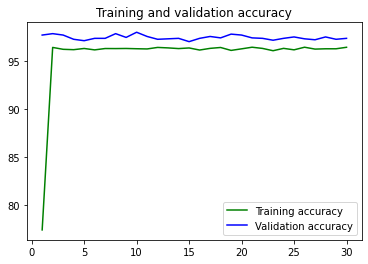

<Figure size 432x288 with 0 Axes>

In [26]:
plt.plot(range(1,31), training_accs, 'g', label='Training accuracy')
plt.plot(range(1,31), val_accs, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

Loading a saved model which got better validation accuracy without overfitting

In [36]:
modelloaded = models.vgg16(pretrained=True)
num_ftrs = modelloaded.classifier[6].out_features
modelloaded.fc = nn.Linear(num_ftrs, 10)
modelloaded.load_state_dict(torch.load(filepath+"Models/model_vgg_epoch18.pth"))
modelloaded.eval()
modelloaded = modelloaded.to(device)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Test data Prediction

Donot Rerun from here

In [75]:
testimgnames = [f for f in os.listdir(filepath+"TestData/") if os.path.isfile(os.path.join(filepath+"TestData/", f))]

In [68]:
len(testimgnames)

2019

In [69]:
for filename in testimgnames:
  shutil.copy2(glob(filepath+"TestData/"+filename)[0], filepath+"TestData/"+dataList[dataList['img'] == filename]["classname"].iloc[0])

In [ ]:
for fname in testimgnames:
    os.remove(glob(filepath+"TestData/"+fname)[0])

In [77]:
str(len(glob(filepath+'TestData/*.jpg')))

'0'

In [79]:
str(len(glob(filepath+'TestData/*/*.jpg')))

'2019'

Total number of test data : 2019


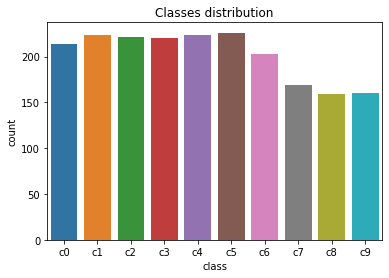

In [81]:
d = {"img" : [], "class" : []}
for c in classes:
    imgs = [img for img in os.listdir(os.path.join(filepath+"TestData",c)) if not img.startswith(".")]
    for img in imgs:
        d["img"].append(img)
        d["class"].append(c)
df = pd.DataFrame(d)
ax = sns.countplot(data=df,x="class")
ax.set(title="Classes distribution")
print("Total number of test data :",len(df))

Donot rerun till above

In [28]:
testdata = datasets.ImageFolder(root = filepath+"TestData", transform = transform)
test_loader = torch.utils.data.DataLoader(dataset=testdata,
                                           batch_size=32,
                                           shuffle=True,
                                           drop_last=False,
                                           num_workers=2)


In [29]:
def true_pred(test_data,model):
    y_true = []
    y_pred = []
    n = len(test_data)
    sum = 0
    with torch.no_grad():
        for x,y in tqdm(test_data):
            x = x.to(device)
            pred = torch.argmax(model(x),dim=1)
            y_true.extend(list(np.array(y)))
            y_pred.extend(list(np.array(pred.cpu())))
    return y_true,y_pred

In [37]:
y_true,y_pred = true_pred(test_loader,modelloaded)

100%|██████████| 64/64 [00:19<00:00,  3.21it/s]


In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)*100

82.02080237741455

Performance Metrics

In [44]:
precision = precision_score(y_true,y_pred, pos_label='positive',average='micro')
print('Precision: ', precision)

Precision:  0.8202080237741456


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


In [45]:
f1 = f1_score(y_true,y_pred, pos_label='positive',average='micro')
print('F1 score: ', f1)

F1 score:  0.8202080237741455


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


In [46]:
recallscore = recall_score(y_true,y_pred, pos_label='positive',average='micro')
print('Recall score: ', recallscore)

Recall score:  0.8202080237741456


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


In [47]:
confusionMatrix = confusion_matrix(y_true,y_pred)


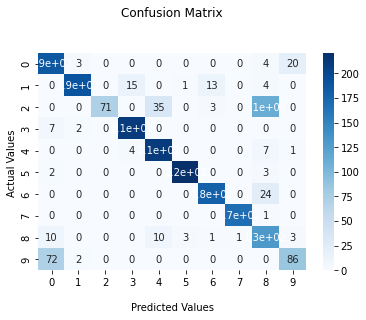

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

ax = sns.heatmap(confusionMatrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
#ax.xaxis.set_ticklabels(['False','True'])
#ax.yaxis.set_ticklabels(['False','True'])
plt.show()

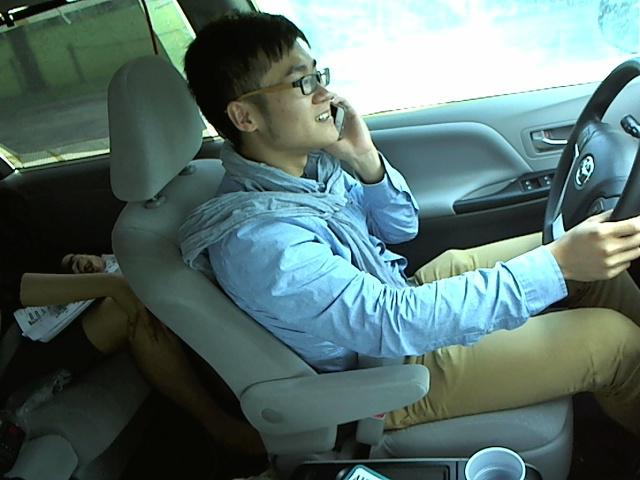

Predicted class: talking on the phone - left
Confidence: 0.9986
2nd answer: hair and makeup
Confidence: 0.0012
The ground truth label is:  talking on the phone - left




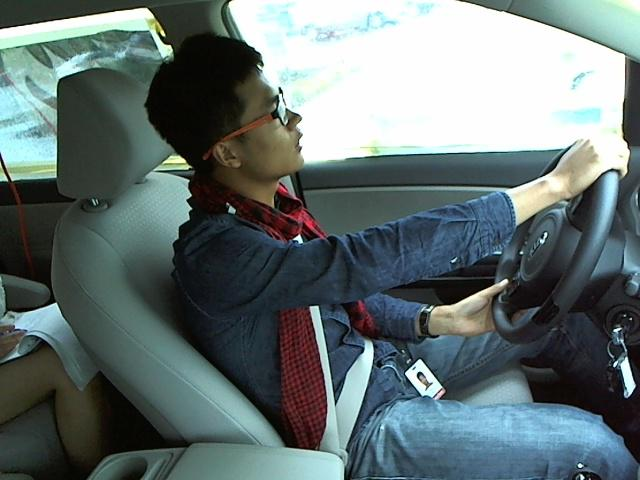

Predicted class: safe driving
Confidence: 0.9769
2nd answer: hair and makeup
Confidence: 0.011
The ground truth label is:  safe driving




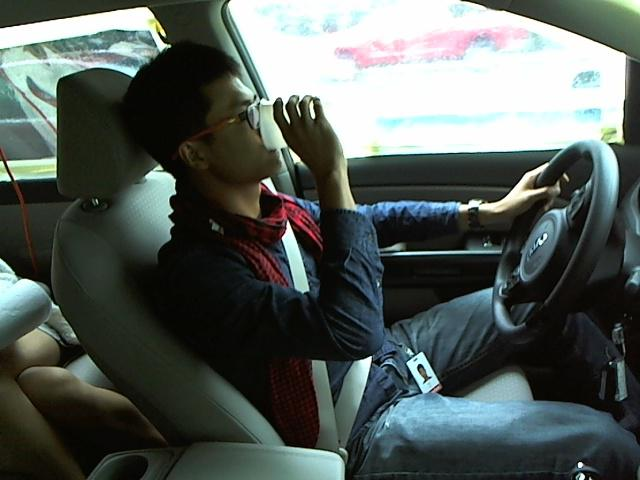

Predicted class: hair and makeup
Confidence: 0.96
2nd answer: drinking
Confidence: 0.0389
The ground truth label is:  drinking




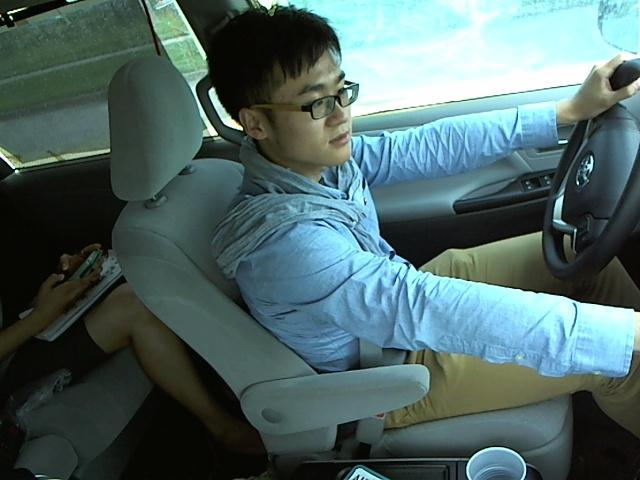

Predicted class: operating the radio
Confidence: 0.9882
2nd answer: safe driving
Confidence: 0.004
The ground truth label is:  operating the radio




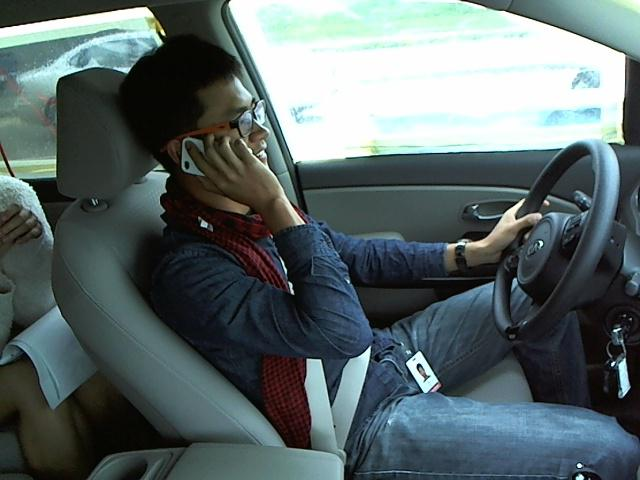

Predicted class: talking on the phone - right
Confidence: 0.508
2nd answer: hair and makeup
Confidence: 0.4904
The ground truth label is:  talking on the phone - right




In [114]:
files = np.random.choice(dataList[dataList['subject'].isin(['p012','p026'])]['img'].tolist(),5)
for file in files:
  im_path = glob(filepath+'TestData/*/'+file)[0]
  display(Image(filename=im_path))
  with PIL.Image.open(im_path) as im:
    im = transform(im)
    im = im.unsqueeze(0)
    output = modelloaded(im.cuda())
    proba = nn.Softmax(dim=1)(output)
    proba = [round(float(elem),4) for elem in proba[0]]
    #print(proba)
    print("Predicted class:",class_dict[proba.index(max(proba))])
    print("Confidence:",max(proba))
    proba2 = proba.copy()
    proba2[proba2.index(max(proba2))] = 0.
    print("2nd answer:",class_dict[proba2.index(max(proba2))])
    print("Confidence:",max(proba2))
    print("The ground truth label is: ",class_dict[int(dataList[dataList['img'] == file]["classname"].iloc[0][1:])])
    print("\n")

Saliency Maps

In [67]:
from utils.cam_utils import (
    get_img_arr,
    make_gradcam_heatmap,
    make_gradcam_img,
    view_img,
)

ModuleNotFoundError: ignored

In [66]:
n_samples = 10
sampled_img_paths = np.random.choice(glob(filepath+'TestData/*/*.jpg'), n_samples)
last_conv_layer_name = "top_conv"
gradcam_img_arrs, labels = [], []

for img_path in sampled_img_paths:
    img_arr = get_img_arr(img_path, (img_size, img_size))
    heatmap_arr, label = make_gradcam_heatmap(img_arr, modelloaded, last_conv_layer_name)
    gradcam_img_arr = make_gradcam_img(
        img_path,
        heatmap_arr,
        cam_path=os.path.join(proc_data_path, img_path.split(os.path.sep)[-1]),
    )
    gradcam_img_arrs.append(gradcam_img_arr / 255.0)
    labels.append(label.numpy())

NameError: ignored